In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys

import functions.handy_functions as hf
import functions.parse_data as parse

from sklearn.decomposition import PCA

2024-04-17 09:26:22.090670: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-17 09:26:22.124507: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-17 09:26:22.124527: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-17 09:26:22.125367: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-17 09:26:22.131470: I tensorflow/core/platform/cpu_feature_guar

In [2]:

data_clear=parse.parse('cloudrm_clear_black_surf.dat')
data_ice=parse.parse('cloudrm_ice_black_surf.dat')
data_mixed=parse.parse('cloudrm_mixed_black_surf.dat')
data_water=parse.parse('cloudrm_water_black_surf.dat')

data_all=pd.concat([data_water,data_clear,data_mixed,data_ice])
data_all=data_all.drop(columns=['Cloud_B01','Clear_B01'])

data_all=hf.dumb_down_surface(data_all) #Create simpler labels for surface descriptio 

In [3]:
data_all.Surface_Desc.value_counts()

Surface_Desc
vegetation-tree-quercus        21757
vegetation-tree-pinus           9886
vegetation-shrub-baccharis      9255
vegetation-shrub-ceanothus      9233
vegetation-shrub-calocedrus     4891
                               ...  
soil-inceptisol-xerumbrept       239
vegetation-shrub-gasteria        228
vegetation-tree-caesalpina       223
vegetation-tree-phytolacca       221
soil-mollisol-paleustoll         219
Name: count, Length: 139, dtype: int64

In [4]:
data_all.Surface_Desc_Dumb.value_counts()

Surface_Desc_Dumb
vegetation                     141004
rock                            21258
nonphotosyntheticvegetation     15611
water                           11486
soil                            10641
Name: count, dtype: int64

In [5]:
data_all.columns

Index(['Cloud_B02', 'Cloud_B03', 'Cloud_B04', 'Cloud_B05', 'Cloud_B06',
       'Cloud_B07', 'Cloud_B08', 'Cloud_B09', 'Cloud_B10', 'Cloud_B11',
       'Cloud_B12', 'Cloud_B13', 'Clear_B02', 'Clear_B03', 'Clear_B04',
       'Clear_B05', 'Clear_B06', 'Clear_B07', 'Clear_B08', 'Clear_B09',
       'Clear_B10', 'Clear_B11', 'Clear_B12', 'Clear_B13', 'Sat_Zenith_Angle',
       'Sun_Zenith_Angle', 'Azimuth_Diff_Angle', 'COT', 'Cloud_Type',
       'Profile_ID', 'GOT', 'Water_Vapor', 'Surface_Desc',
       'Surface_Desc_Dumb'],
      dtype='object')

(array([4.9766e+04, 9.5635e+04, 2.3858e+04, 1.1108e+04, 7.3290e+03,
        4.7380e+03, 3.6140e+03, 2.4630e+03, 1.3970e+03, 9.2000e+01]),
 array([0.00021 , 0.000475, 0.00074 , 0.001005, 0.00127 , 0.001535,
        0.0018  , 0.002065, 0.00233 , 0.002595, 0.00286 ]),
 <BarContainer object of 10 artists>)

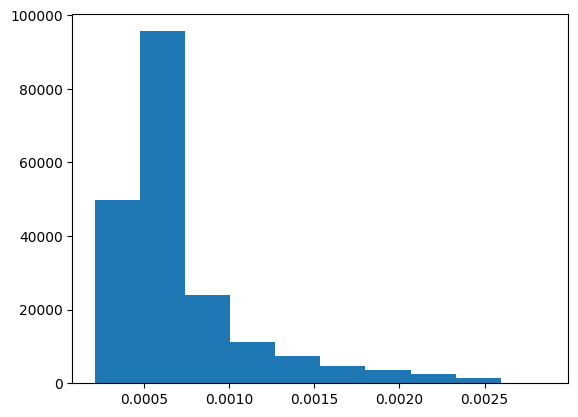

In [6]:
plt.hist(data_all['Clear_B12'])

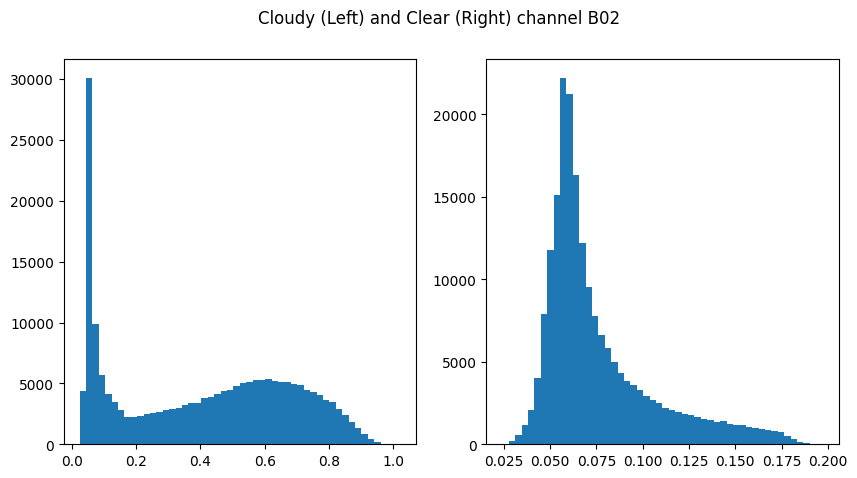

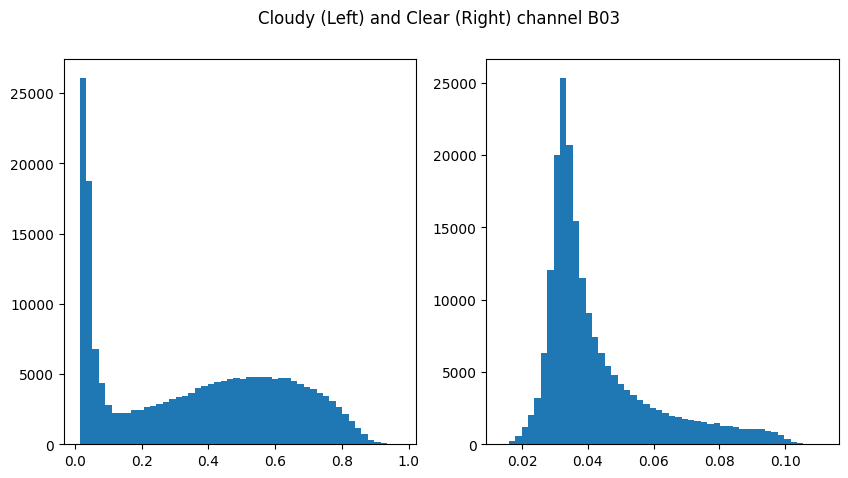

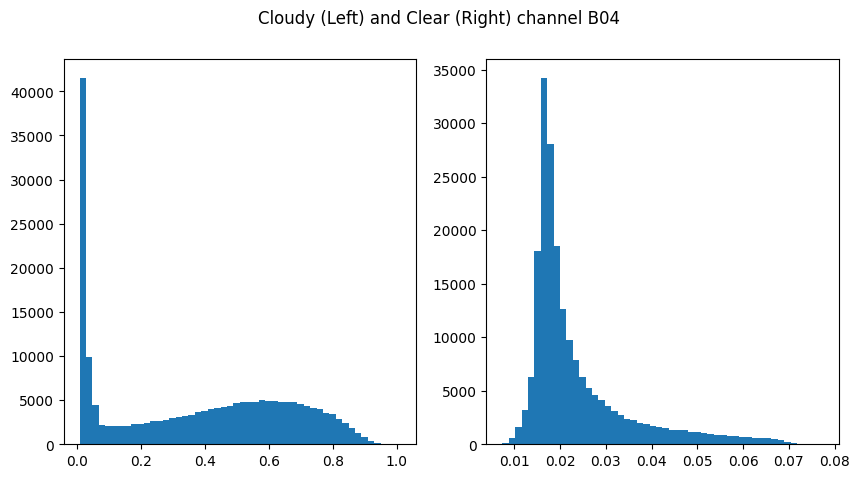

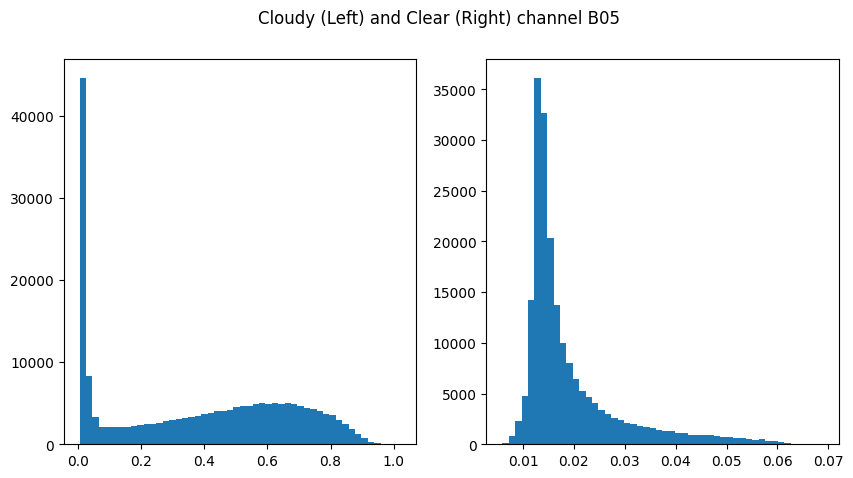

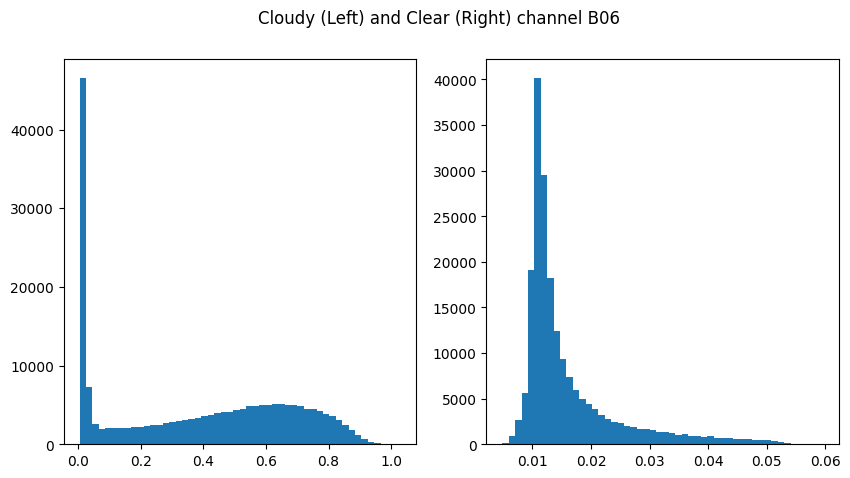

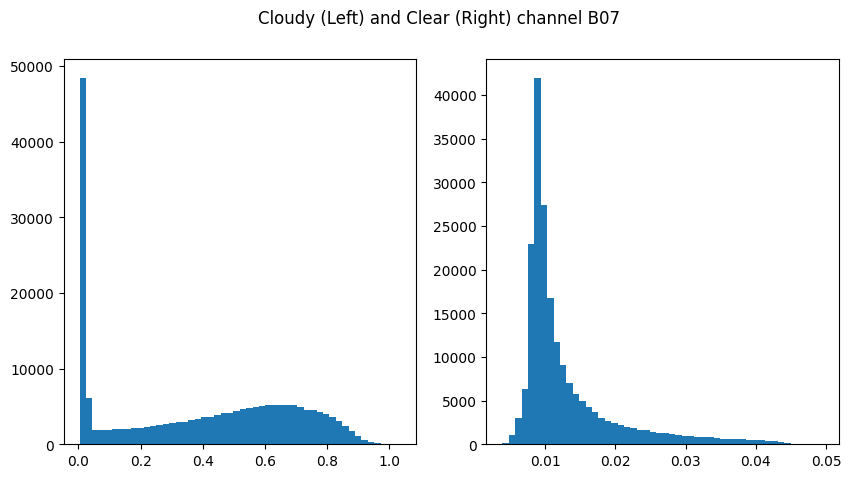

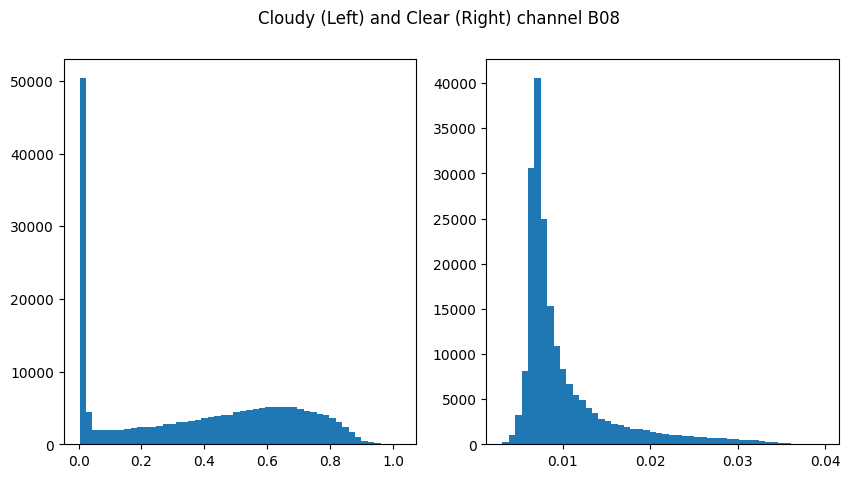

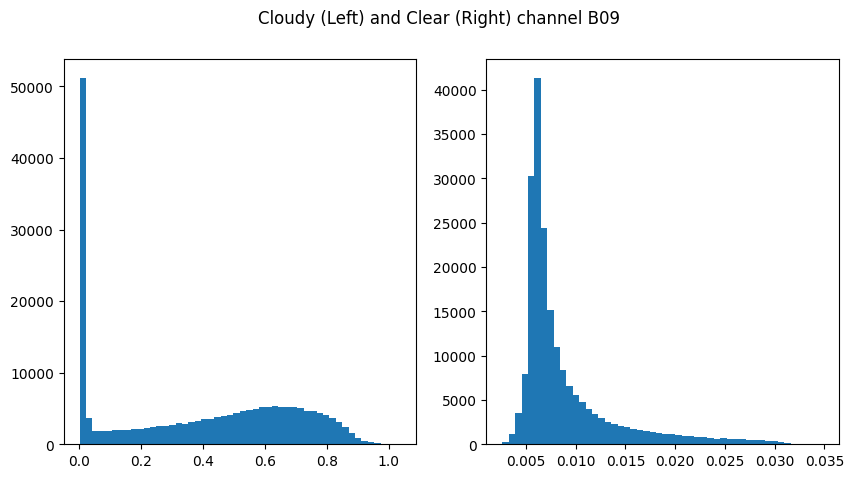

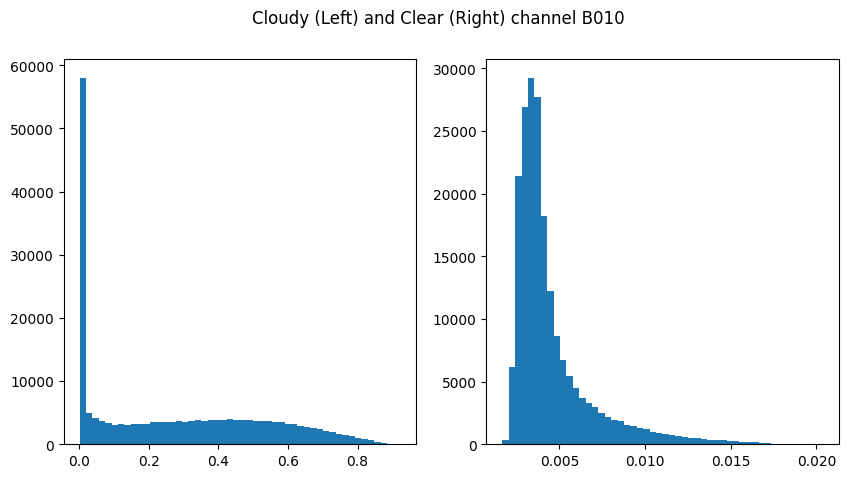

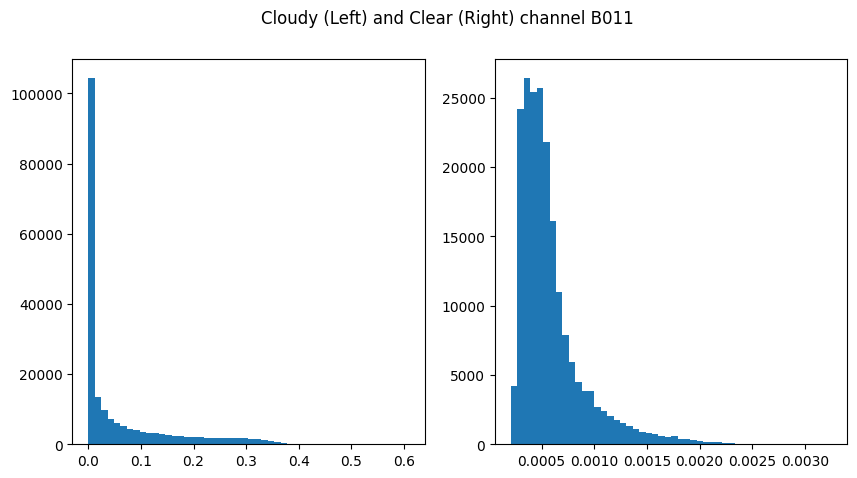

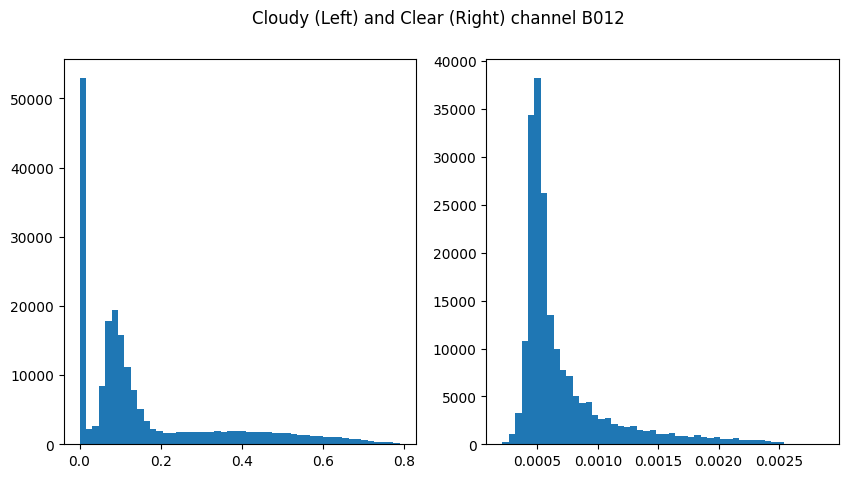

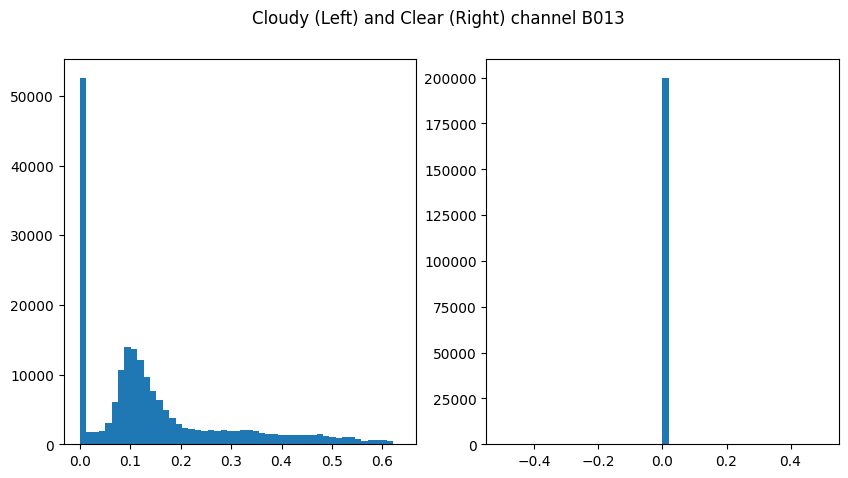

In [7]:
plt.rcParams["figure.figsize"] = [10, 5]
for i in range(2,14):
    fig, (ax1, ax2) = plt.subplots(1,2)
    fig.suptitle("Cloudy (Left) and Clear (Right) channel B0"+str(i))
    if i<=9:
        ax1.hist(data_all['Cloud_'+'B0'+str(i)],bins=50)
        ax2.hist(data_all['Clear_'+'B0'+str(i)],bins=50)
    else:
        ax1.hist(data_all['Cloud_'+'B'+str(i)],bins=50)
        ax2.hist(data_all['Clear_'+'B'+str(i)],bins=50)

In [8]:
data_tap=data_all[data_all['Surface_Desc']=='water-tapwater-none']

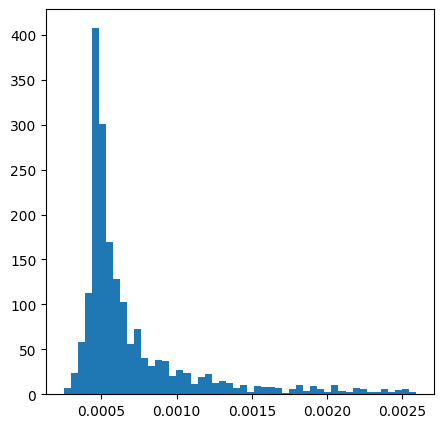

In [9]:
plt.rcParams["figure.figsize"] = [5, 5]
plt.hist(data_tap['Clear_B12'],bins=50)
plt.show()

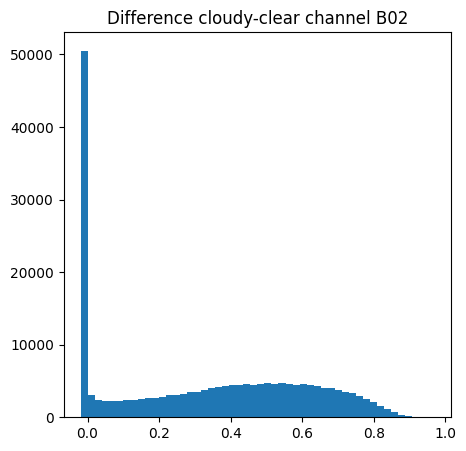

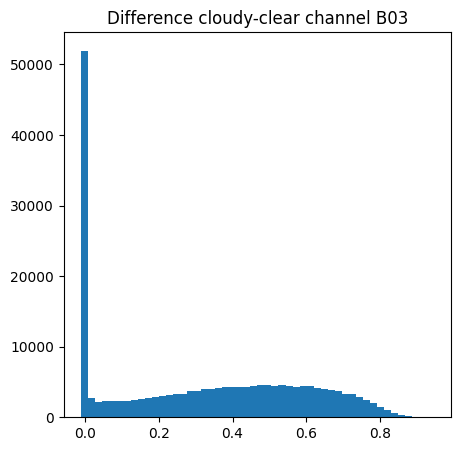

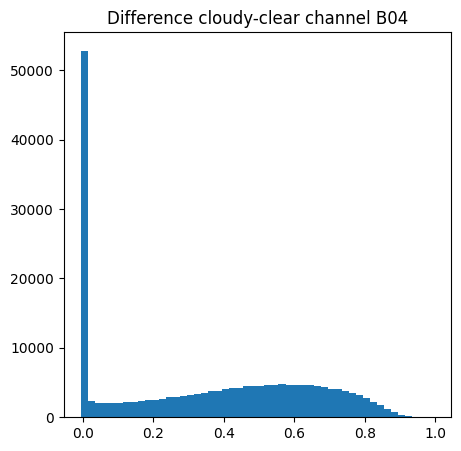

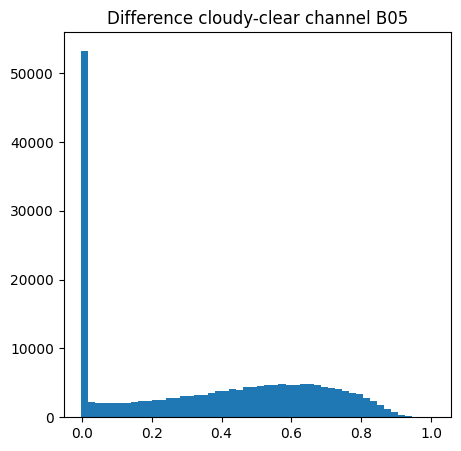

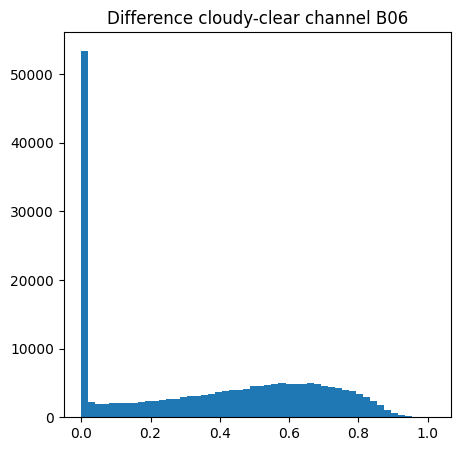

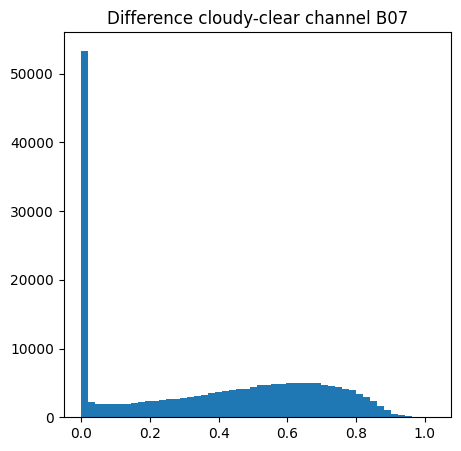

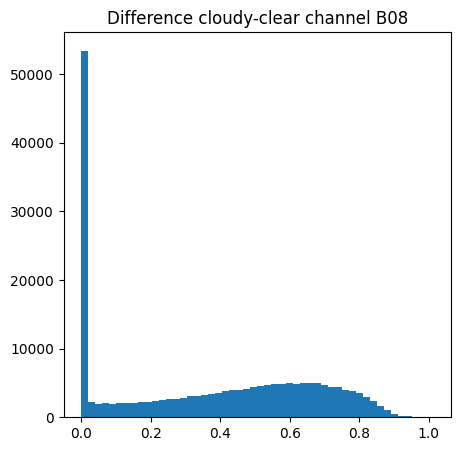

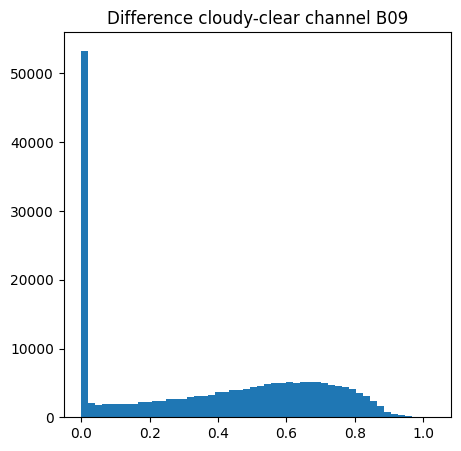

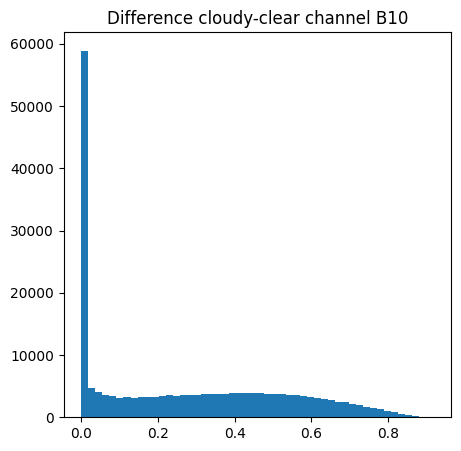

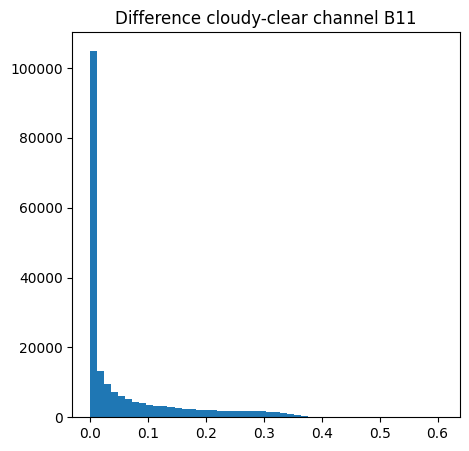

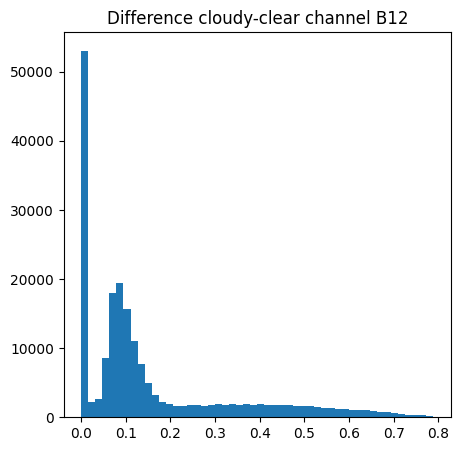

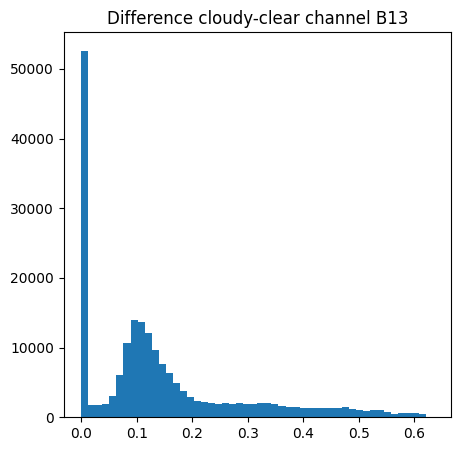

In [10]:
for i in range(2,14):
    
    if i<=9:
        plt.hist(data_all['Cloud_'+'B0'+str(i)]-data_all['Clear_'+'B0'+str(i)],bins=50)
        plt.title("Difference cloudy-clear channel B0"+str(i))
        plt.show()
    else:
        plt.hist(data_all['Cloud_'+'B'+str(i)]-data_all['Clear_'+'B'+str(i)],bins=50)
        plt.title("Difference cloudy-clear channel B"+str(i))
        plt.show()

## Histograms divided by surface description

In [11]:
data_all.Surface_Desc.value_counts()

Surface_Desc
vegetation-tree-quercus        21757
vegetation-tree-pinus           9886
vegetation-shrub-baccharis      9255
vegetation-shrub-ceanothus      9233
vegetation-shrub-calocedrus     4891
                               ...  
soil-inceptisol-xerumbrept       239
vegetation-shrub-gasteria        228
vegetation-tree-caesalpina       223
vegetation-tree-phytolacca       221
soil-mollisol-paleustoll         219
Name: count, Length: 139, dtype: int64

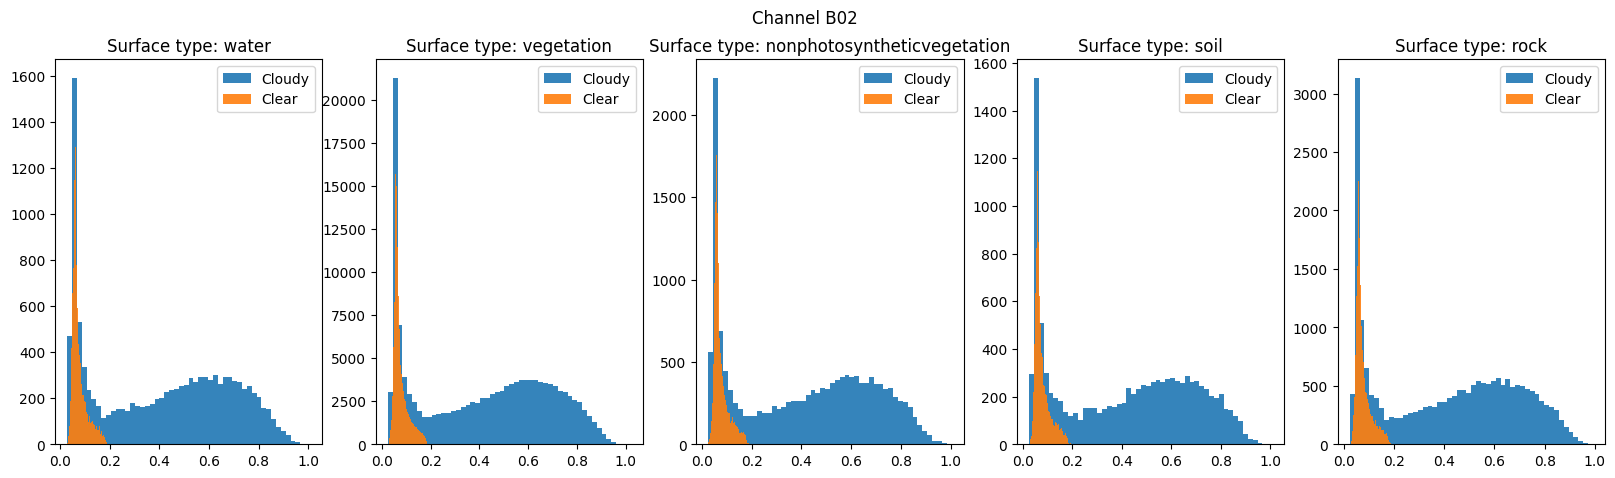

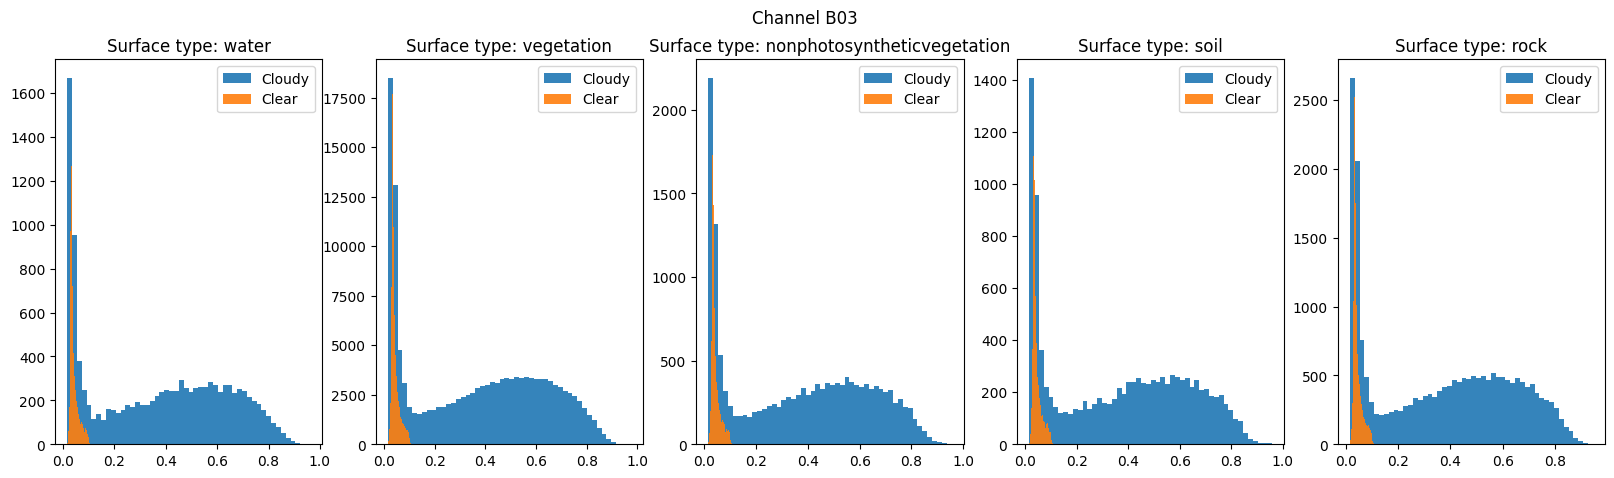

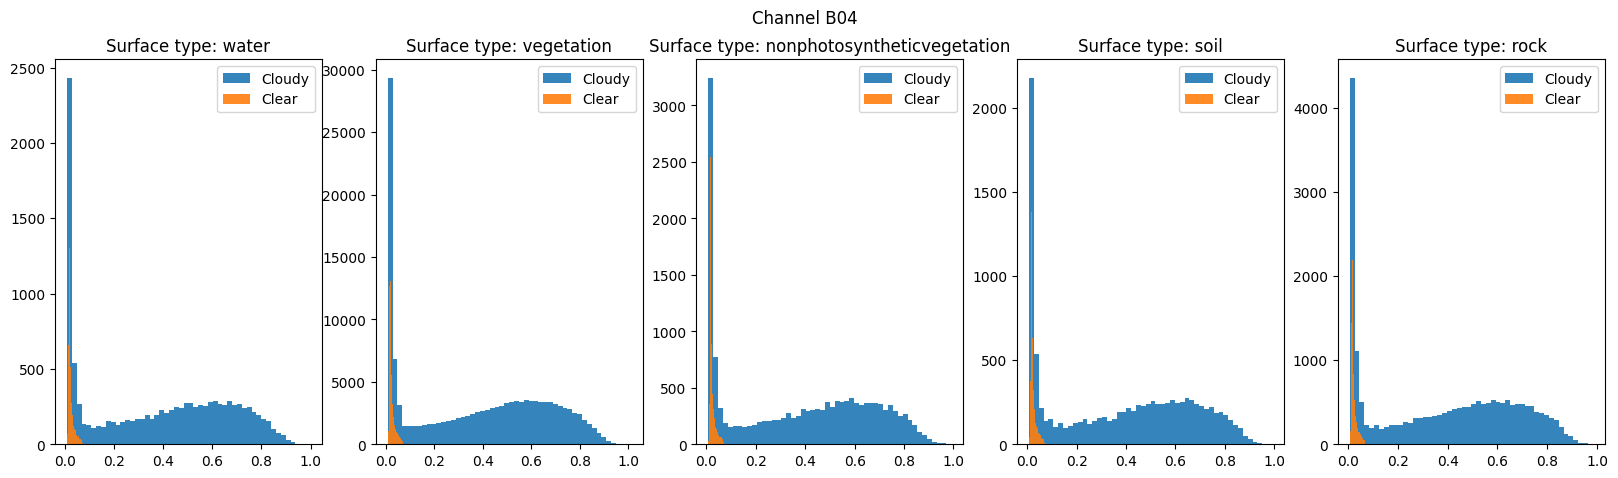

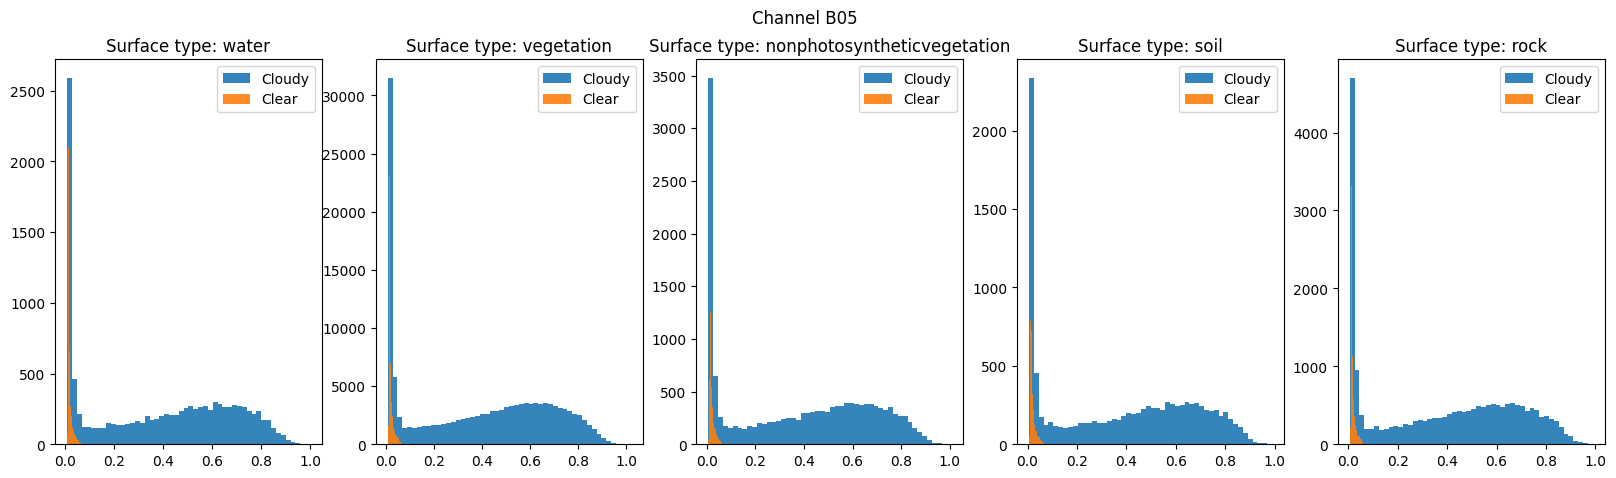

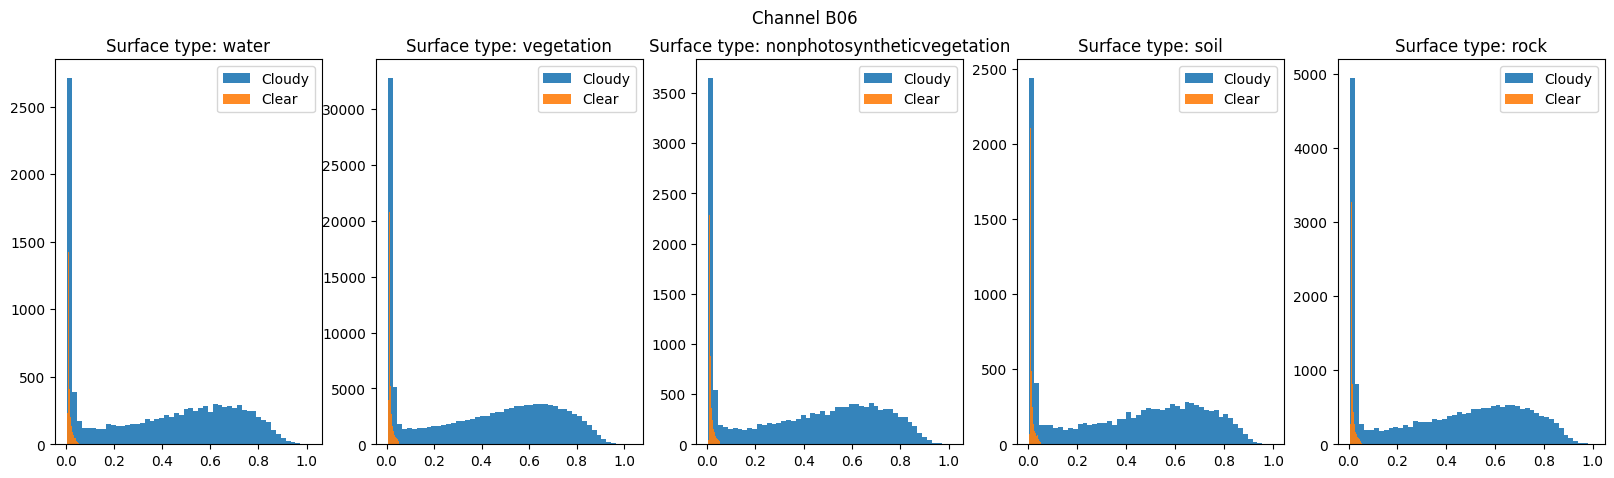

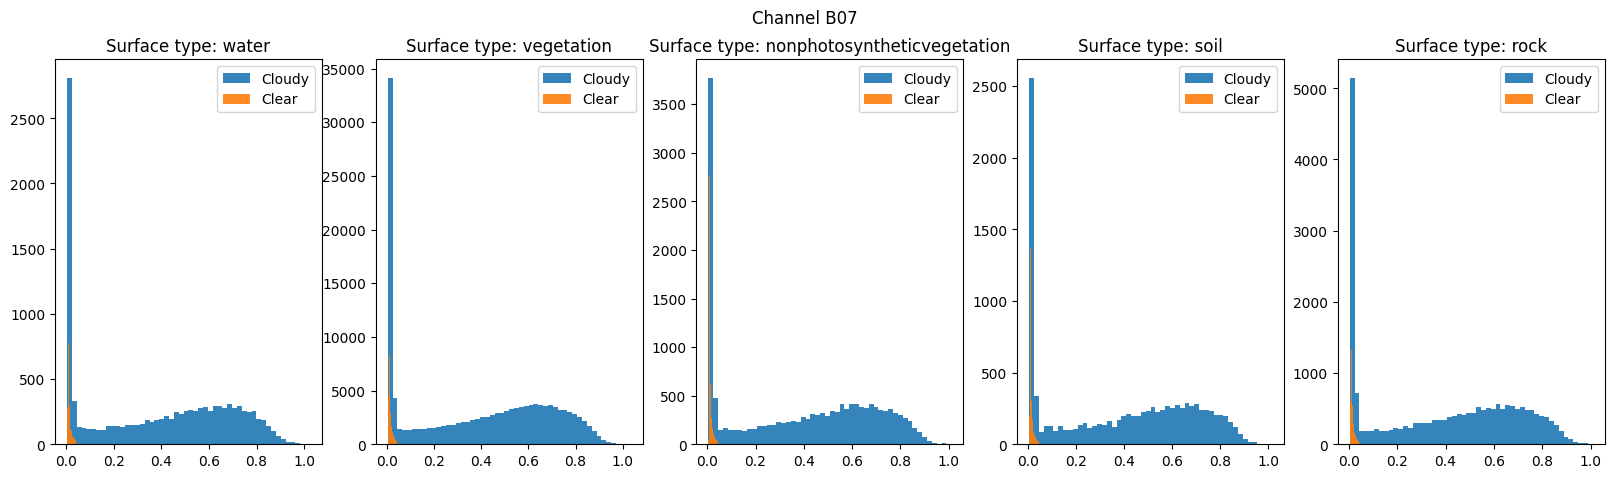

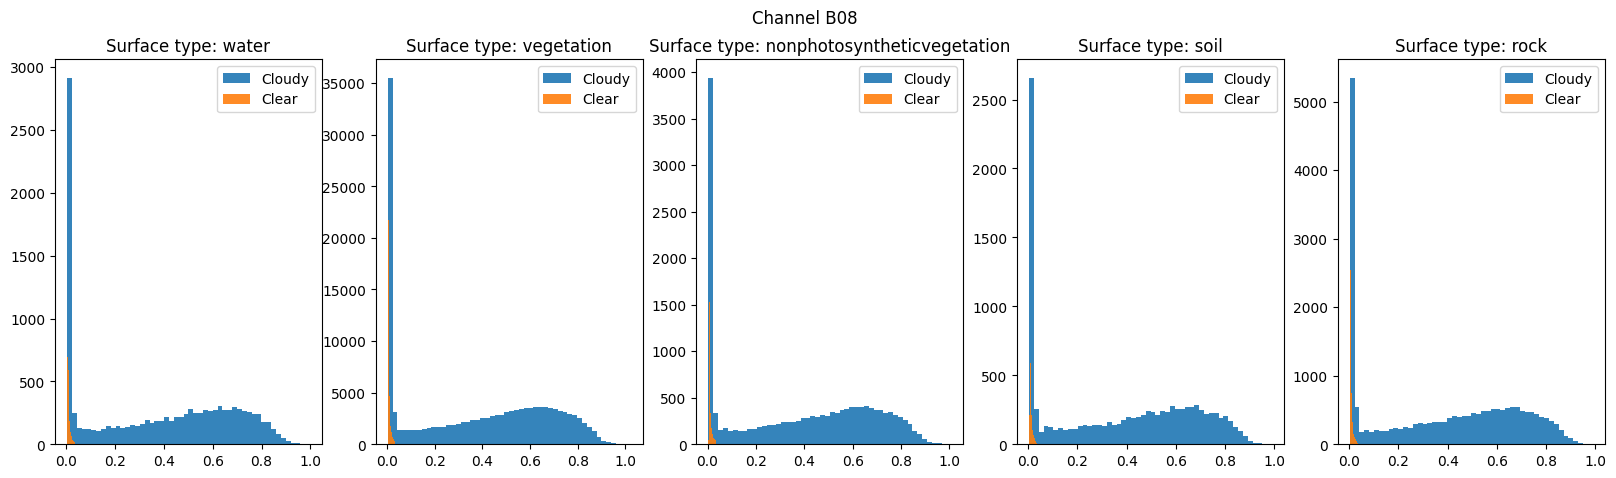

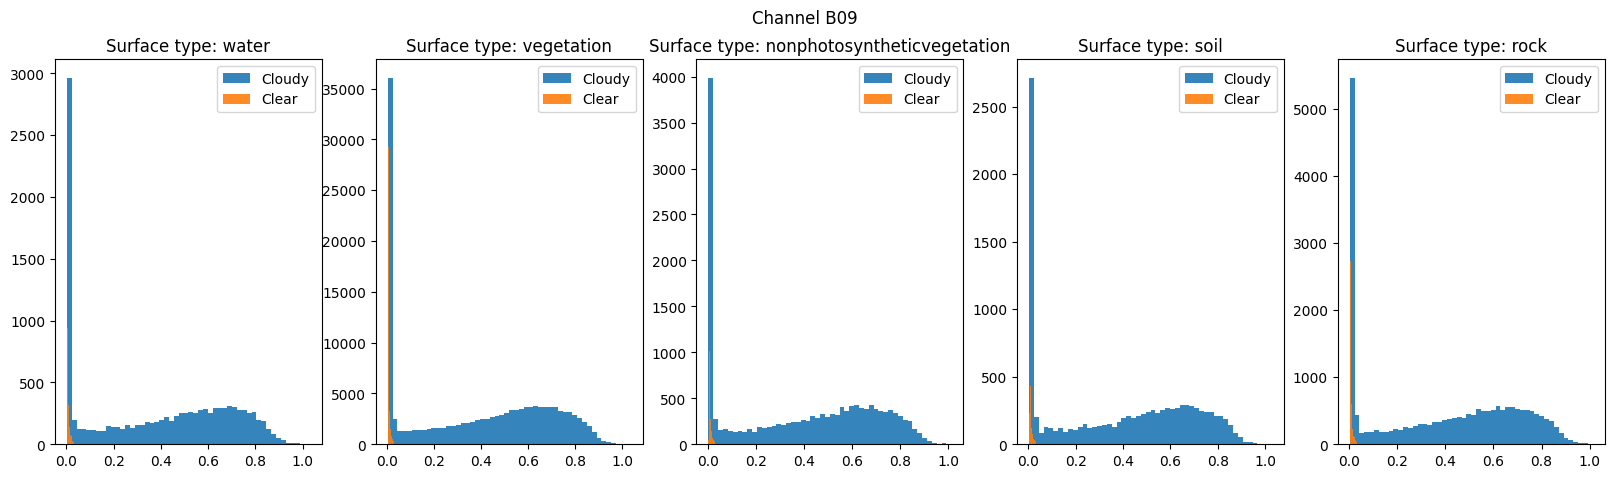

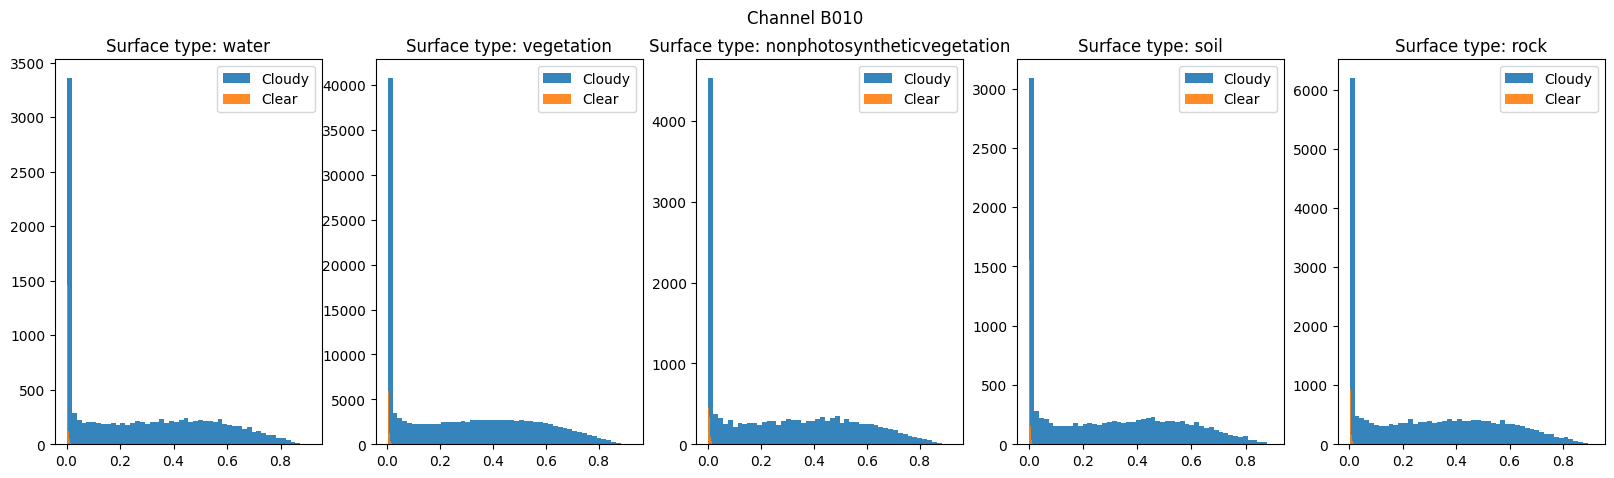

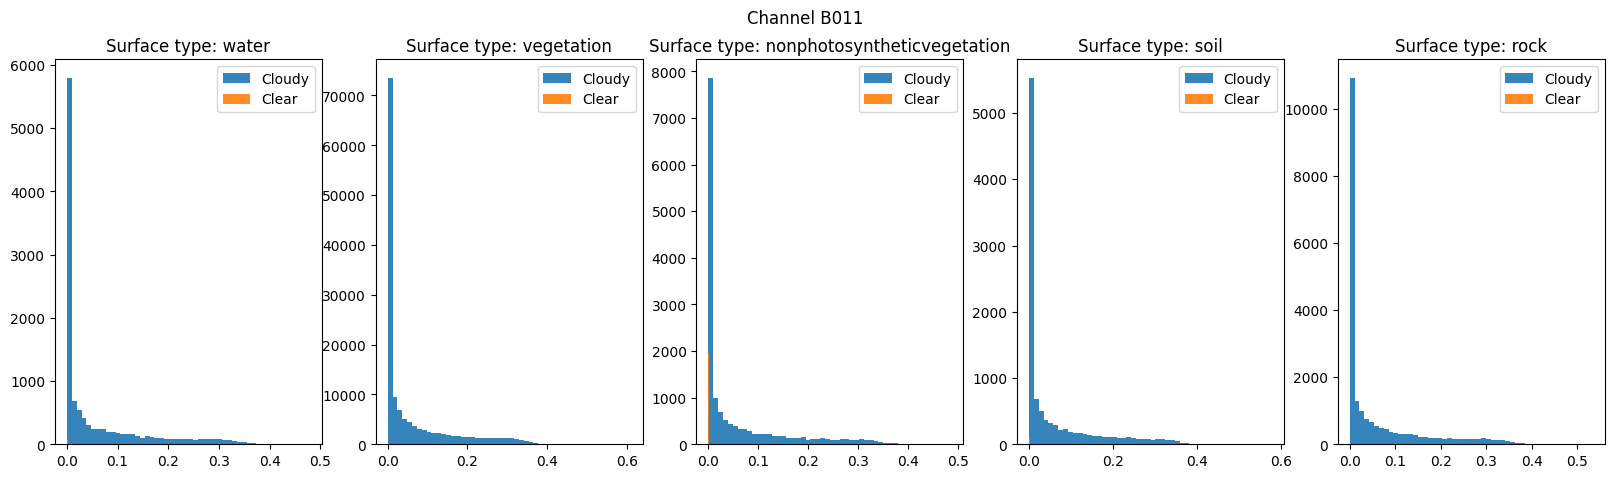

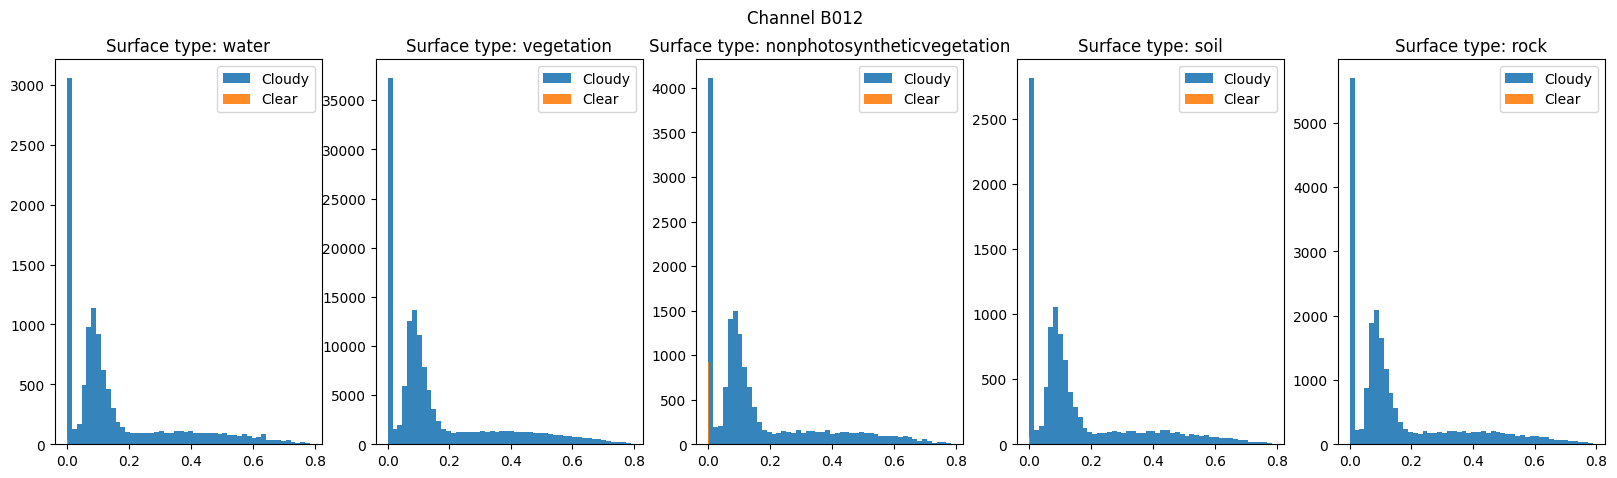

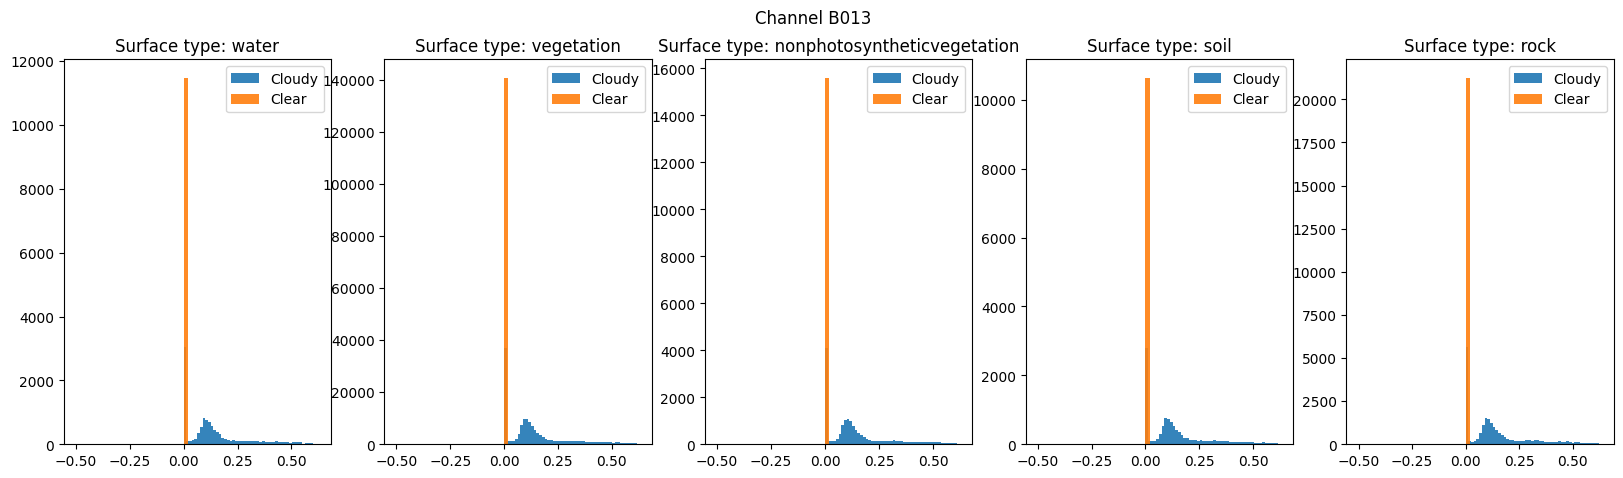

In [12]:
surface_labels=data_all.Surface_Desc_Dumb.unique()
plt.rcParams["figure.figsize"] = [20, 5]
for i in range(2,14):
    fig, axs = plt.subplots(1,len(surface_labels))
    
    if i<=9:
        fig.suptitle("Channel B0"+str(i))
        for j,label in enumerate(surface_labels):
            df_tmp=data_all[data_all['Surface_Desc_Dumb']==label]

            axs[j].hist(df_tmp['Cloud_'+'B0'+str(i)],bins=50,alpha=0.9)
            axs[j].hist(df_tmp['Clear_'+'B0'+str(i)],bins=50,alpha=0.9)
            axs[j].title.set_text('Surface type: '+label)
            axs[j].legend(['Cloudy','Clear'])

    else:
        fig.suptitle("Channel B0"+str(i))
        for j,label in enumerate(surface_labels):
            df_tmp=data_all[data_all['Surface_Desc_Dumb']==label]

            axs[j].hist(df_tmp['Cloud_'+'B'+str(i)],bins=50,alpha=0.9)
            axs[j].hist(df_tmp['Clear_'+'B'+str(i)],bins=50,alpha=0.9)
            axs[j].title.set_text('Surface type: '+label)
            axs[j].legend(['Cloudy','Clear'])

In [13]:
data_all.columns

Index(['Cloud_B02', 'Cloud_B03', 'Cloud_B04', 'Cloud_B05', 'Cloud_B06',
       'Cloud_B07', 'Cloud_B08', 'Cloud_B09', 'Cloud_B10', 'Cloud_B11',
       'Cloud_B12', 'Cloud_B13', 'Clear_B02', 'Clear_B03', 'Clear_B04',
       'Clear_B05', 'Clear_B06', 'Clear_B07', 'Clear_B08', 'Clear_B09',
       'Clear_B10', 'Clear_B11', 'Clear_B12', 'Clear_B13', 'Sat_Zenith_Angle',
       'Sun_Zenith_Angle', 'Azimuth_Diff_Angle', 'COT', 'Cloud_Type',
       'Profile_ID', 'GOT', 'Water_Vapor', 'Surface_Desc',
       'Surface_Desc_Dumb'],
      dtype='object')

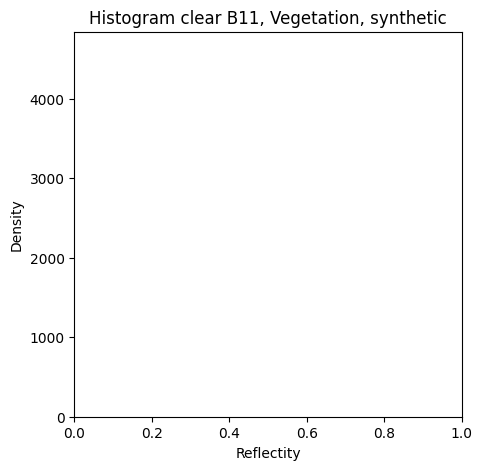

In [14]:
df_tmp=data_all.loc[data_all['Surface_Desc_Dumb']=='vegetation']
plt.rcParams["figure.figsize"] = [5, 5]
plt.hist(df_tmp['Clear_B12'],bins=50,density=True)
plt.xlim([0,1])
plt.title('Histogram clear B11, Vegetation, synthetic')
plt.xlabel('Reflectity')
plt.ylabel('Density')
plt.show()

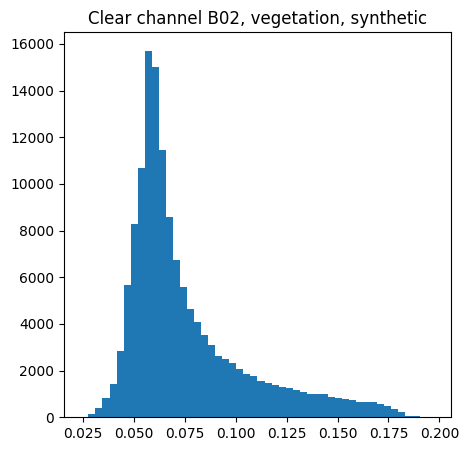

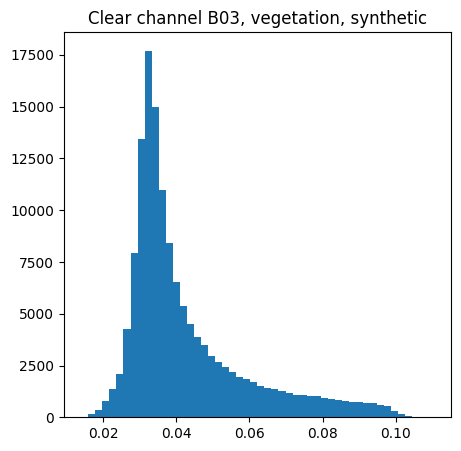

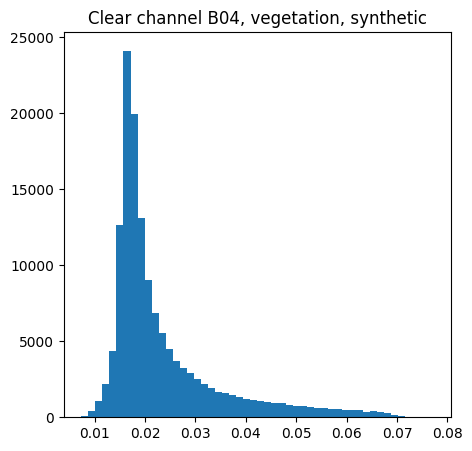

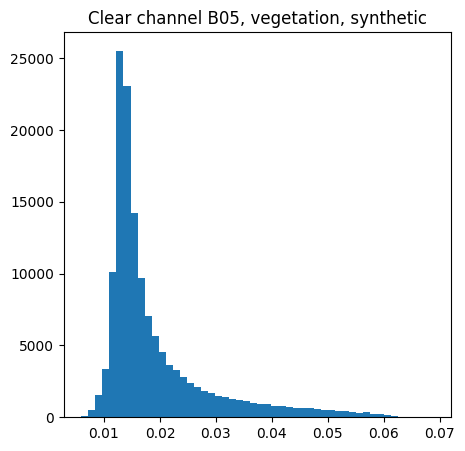

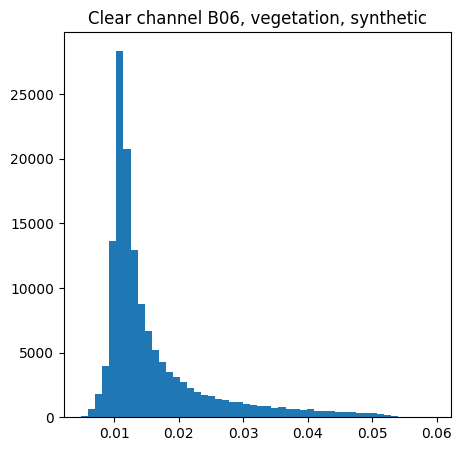

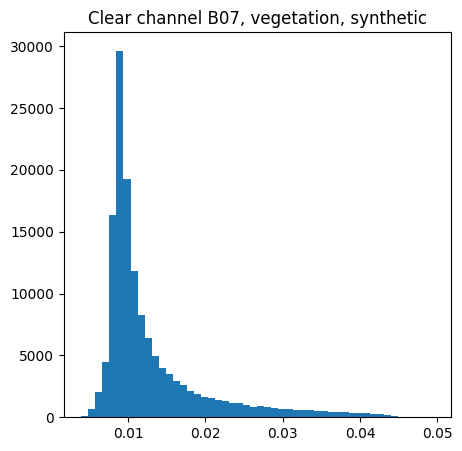

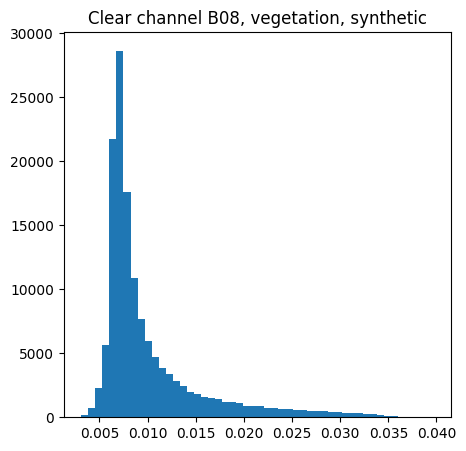

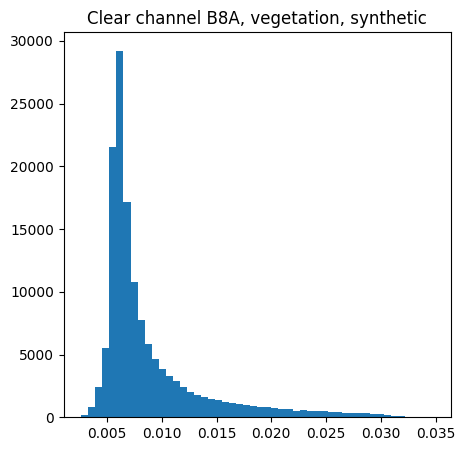

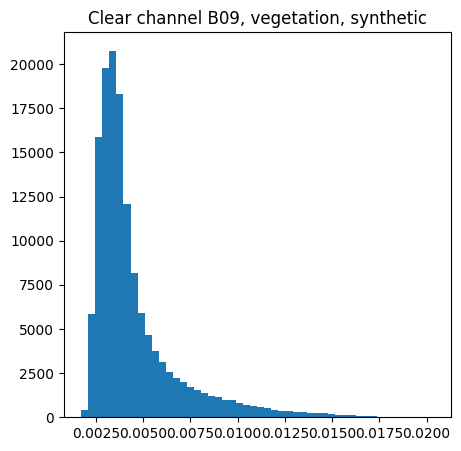

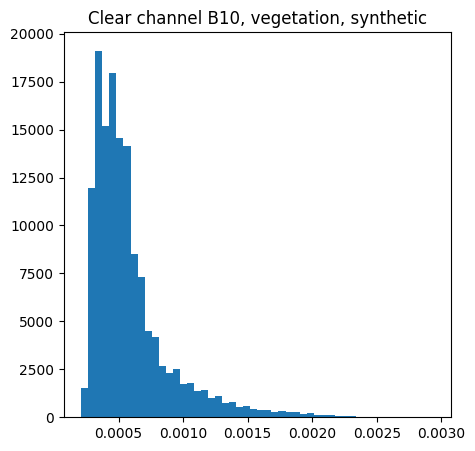

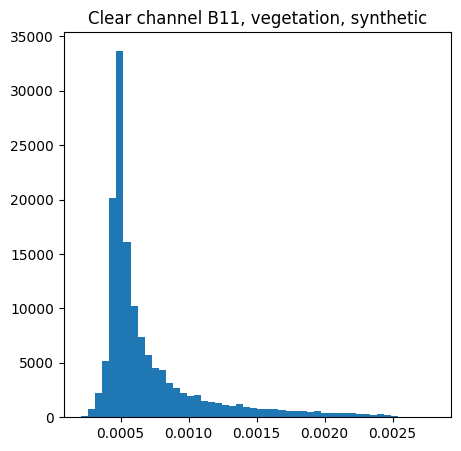

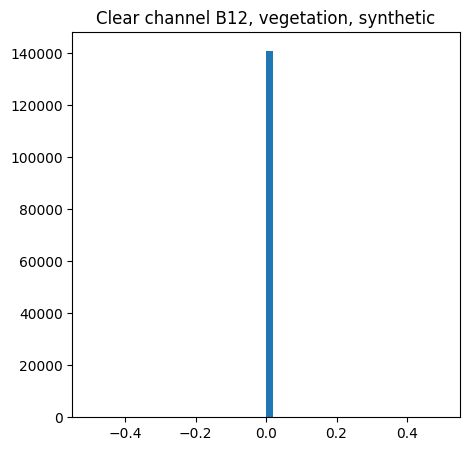

In [15]:

plt.rcParams["figure.figsize"] = [5, 5]
for i in range(2,14):
    df_tmp=data_all[data_all['Surface_Desc_Dumb']=='vegetation']
    if i<=8:
        plt.hist(df_tmp['Clear_'+'B0'+str(i)],bins=50)
        plt.title('Clear channel B0'+str(i)+', vegetation, synthetic')
    elif i==9:
        plt.hist(df_tmp['Clear_'+'B0'+str(i)],bins=50)
        plt.title('Clear channel B8A, vegetation, synthetic')
    elif i==10:
        plt.hist(df_tmp['Clear_'+'B'+str(i)],bins=50)
        plt.title('Clear channel B09, vegetation, synthetic')
    else:   
        plt.hist(df_tmp['Clear_'+'B'+str(i)],bins=50)
        plt.title('Clear channel B'+str(i-1)+', vegetation, synthetic')
    plt.show()



In [16]:
tm=data_all[data_all['Surface_Desc_Dumb']=='vegetation']
tm.Clear_B13.value_counts()

Clear_B13
0.0    141004
Name: count, dtype: int64

In [17]:
cloudy_columns=['Cloud_B02', 'Cloud_B03', 'Cloud_B04', 'Cloud_B05',
                'Cloud_B06', 'Cloud_B07', 'Cloud_B08', 'Cloud_B09', 'Cloud_B10',
                'Cloud_B11', 'Cloud_B12', 'Cloud_B13']

clear_columns=['Clear_B02','Clear_B03', 'Clear_B04', 
               'Clear_B05', 'Clear_B06', 'Clear_B07','Clear_B08', 
               'Clear_B09', 'Clear_B10', 'Clear_B11', 'Clear_B12',
                'Clear_B13']

channel_columns=['Cloud_B02', 'Cloud_B03', 'Cloud_B04', 'Cloud_B05',
                'Cloud_B06', 'Cloud_B07', 'Cloud_B08', 'Cloud_B09', 'Cloud_B10',
                'Cloud_B11', 'Cloud_B12', 'Cloud_B13',
                'Clear_B02','Clear_B03', 'Clear_B04', 
                'Clear_B05', 'Clear_B06', 'Clear_B07','Clear_B08', 
                'Clear_B09', 'Clear_B10', 'Clear_B11', 'Clear_B12',
                'Clear_B13']

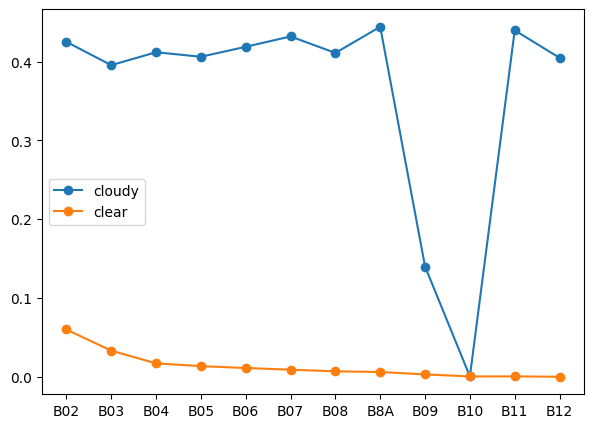

In [26]:
channels=['B02','B03','B04','B05','B06','B07','B08','B8A','B09','B10','B11','B12']

mean_cot=10
df_veg=data_all[data_all['Surface_Desc_Dumb']=='vegetation']
df_veg=df_veg[(df_veg['COT']>(mean_cot-0.5)) & (df_veg['COT']<(mean_cot+0.5))]
df_veg=df_veg[df_veg['Cloud_Type']<=6]
sample=df_veg.iloc[0]


plt.rcParams["figure.figsize"] = [7, 5]
plt.plot(channels,sample[cloudy_columns].to_numpy(),'-o')
plt.plot(channels,sample[clear_columns].to_numpy(),'-o')
plt.legend(['cloudy','clear'])
plt.show()

In [34]:
cloud_types=[ 'Stratus Continental', 'Stratus Maritime', 
             'Cumulus Continental Clean', 'Cumulus Continental Polluted', 
             'Cumulus Maritime', 'Cirrus']

Text(0.5, 0.98, 'Black surface vegetation, COT = 10')

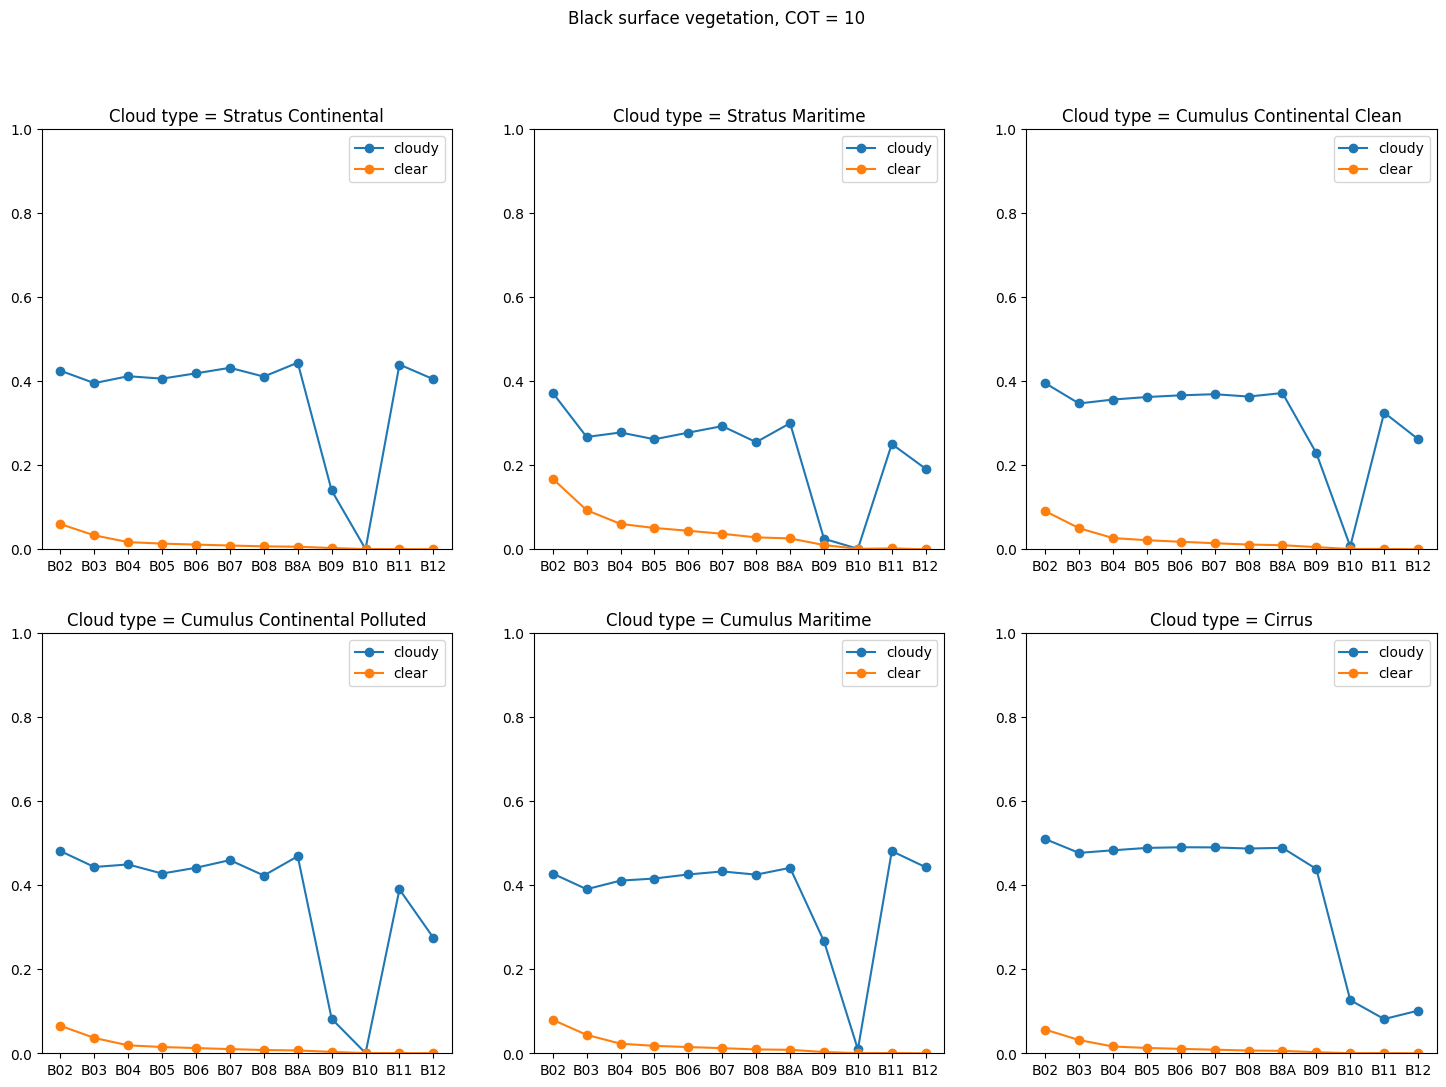

In [52]:
mean_cot=10
df_veg=data_all[data_all['Surface_Desc_Dumb']=='vegetation']
df_veg=df_veg[(df_veg['COT']>(mean_cot-0.5)) & (df_veg['COT']<(mean_cot+0.5))]
df_veg=df_veg[df_veg['Cloud_Type']<=6]



nrows=2
ncols=int(len(df_veg.Cloud_Type.unique())/2)

plt.rcParams["figure.figsize"] = [6*ncols, 6*nrows]

fig,axs=plt.subplots(ncols=ncols,nrows=nrows)
for i,c_type in enumerate(df_veg.Cloud_Type.unique()):
    if i<3:
        df_tmp=df_veg[df_veg['Cloud_Type']==c_type]
        sample=df_tmp.iloc[0]
        axs[0,i].plot(channels,sample[cloudy_columns],'-o')
        axs[0,i].plot(channels,sample[clear_columns],'-o')
        axs[0,i].set_ylim([0,1])
        axs[0,i].legend(['cloudy','clear'])
        axs[0,i].set_title('Cloud type = '+cloud_types[i])
    else:
        df_tmp=df_veg[df_veg['Cloud_Type']==c_type]
        sample=df_tmp.iloc[0]
        axs[1,i-3].plot(channels,sample[cloudy_columns],'-o')
        axs[1,i-3].plot(channels,sample[clear_columns],'-o')
        axs[1,i-3].set_ylim([0,1])
        axs[1,i-3].legend(['cloudy','clear'])
        axs[1,i-3].set_title('Cloud type = '+cloud_types[i])
fig.suptitle('Black surface vegetation, COT = '+str(mean_cot))